Dataset

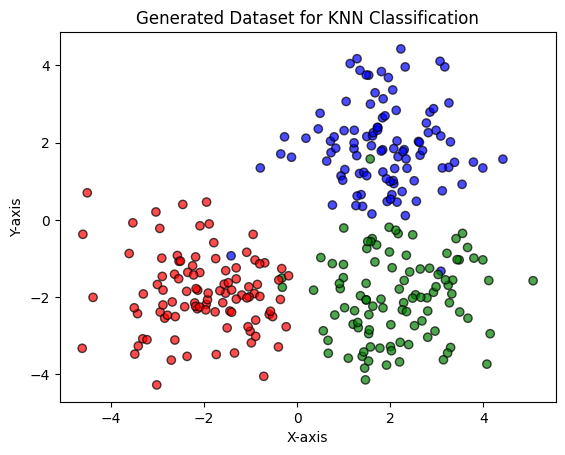

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Generate 3 clusters of points
X, y = make_blobs(n_samples=300, centers=[(-2, -2), (2, 2), (2, -2)], cluster_std=1.0, random_state=2024)

# Define colors for visualization
colors = np.array(['red', 'blue', 'green'])

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=colors[y], edgecolors='k', alpha=0.7)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Generated Dataset for KNN Classification")
plt.show()

Dataset is just coordinate and label [0,1,2]

In [2]:
for i in range(3):
    print(X[i], y[i])


[3.38113809 1.48894842] 1
[2.03527124 0.65188911] 1
[-2.45840155  0.39831512] 0


Train

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))


y_pred = knn.predict(X_test)
print(classification_report(y_pred=y_pred, y_true=y_test))


0.9791666666666666
0.9833333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        18
           2       0.96      1.00      0.98        24

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



Results

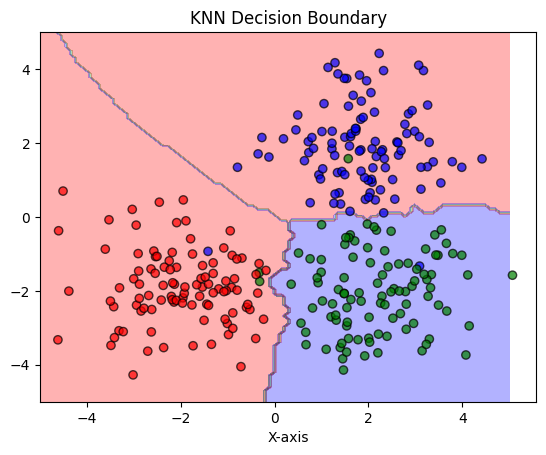

In [4]:
# Create a grid of points
xx, yy = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict class for each point in the grid
Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, colors=['red', 'blue', 'green'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], edgecolors='k', alpha=0.7)
plt.xlabel("X-axis")
plt.title("KNN Decision Boundary")
plt.show()
